# How to do variance thresholding in Python for feature selection

In [39]:

from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
diabetes = load_wine()
df_wine = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [41]:
variance_threshold = 0.1
selection = VarianceThreshold(threshold=variance_threshold)
selection.fit(df_wine)

VarianceThreshold(threshold=0.1)

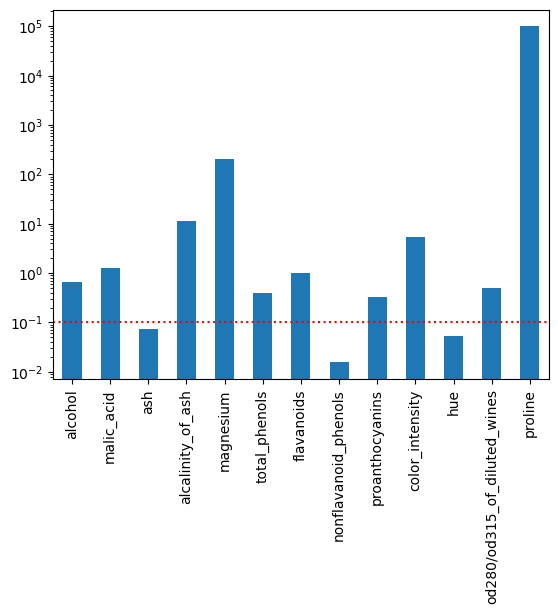

In [42]:
ax = pd.Series(selection.variances_, index=df_wine.columns).plot(kind='bar', logy=True);
ax.axhline(variance_threshold, ls='dotted', c='r');

In [43]:
df_wine_selected = pd.DataFrame(selection.transform(df_wine), columns=df_wine.columns[selection.get_support()])
df_wine_selected.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,2.93,735.0
